In [39]:
# Module Imports

import pandas as pd
import re
import matplotlib.pyplot as plt
import string
import nltk
from textblob import TextBlob, Word
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zeraphim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
dataset = pd.read_csv(r"data.csv", usecols = [0, 1, 2], names = ['Twitter_ID', 'Date_Created','Tweets'])

In [41]:
pd.options.display.max_colwidth = 300
dataset

,Twitter_ID,Date_Created,Tweets
0,1536231166663180288,2022-06-13 06:17:06+00:00,2023 Election is between the Poor and Elite.\n\nMoney will disappoint so many of political in 2023.
1,1536231164549246976,2022-06-13 06:17:06+00:00,"Britain has set the pace of this election along tribal line. Cant u see ? What do u think will happen among Peter obi, Atiku and Tinubu. Guys Nigeria is the world's business center."
2,1536231159784521728,2022-06-13 06:17:04+00:00,Yesterday Meeting Held at UC Masoo Bozdar Tandoalhayar under the supervision of the MPA PS61 @ImdadAliPitafi &amp; other PPP notables regarding upcoming BD election\n@BakhtawarBZ \n@BBhuttoZardari \n@AseefaBZ \n@pitafi_zaheer \n@Amjadpitafi11 \n@PitafiFawad https://t.co/lYwMzDyWfE
3,1536231149411917824,2022-06-13 06:17:02+00:00,"CPPE worries about election-fuelled inflation, distractions from governance.\n CPPE worries about election-fuelled inflation, distractions from governance. By Femi Adekoya. 13 June 2022 | 3:45 am.\n https://t.co/LpXoPDs6qb"
4,1536231145599377409,2022-06-13 06:17:01+00:00,Engr. Rabi'u Kwankwaso of the NNPP will score more votes than Peter Obi of LP in 2023 Presidential election. Mark This!!!
...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,Daddy Freeze sends a strong message to Peter Obi about what he must do about the 2023 election https://t.co/hlJknYD64a
96,1536230311079596032,2022-06-13 06:13:42+00:00,@instablog9ja It keep collapsing so it can be use as an agenda for the next election
97,1536230295607083008,2022-06-13 06:13:38+00:00,@pangolincovid @HaroldHodson2 I feel sure Richard already knows they were making stuff up before the election too. \nLessons learned from a significant election loss???\nDon't think so!
98,1536230294516269056,2022-06-13 06:13:38+00:00,@ezraklein Remember the Democratic primary in 2016... If Twitter wasn't so important then why did they feel the need to suppress DNCLrak and podesta hashtags... Oh yeah and You're on record saying of the 2016 primary election was totally fair. You've got no leg to stand on.


### Percentage Before Pre-processing

In [42]:
#Create a function to get the subjectivity
def getSubjectivity(dataset):
    return TextBlob(dataset).sentiment.subjectivity
    
#Create a function to get the polarity
def getPolarity(dataset):
    return TextBlob(dataset).sentiment.polarity

#Create two new columns
dataset['Subjectivity'] = dataset['Tweets'].apply(getSubjectivity)
dataset['Polarity'] = dataset['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
dataset


,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity
0,1536231166663180288,2022-06-13 06:17:06+00:00,2023 Election is between the Poor and Elite.\n\nMoney will disappoint so many of political in 2023.,0.400000,0.033333
1,1536231164549246976,2022-06-13 06:17:06+00:00,"Britain has set the pace of this election along tribal line. Cant u see ? What do u think will happen among Peter obi, Atiku and Tinubu. Guys Nigeria is the world's business center.",0.100000,-0.100000
2,1536231159784521728,2022-06-13 06:17:04+00:00,Yesterday Meeting Held at UC Masoo Bozdar Tandoalhayar under the supervision of the MPA PS61 @ImdadAliPitafi &amp; other PPP notables regarding upcoming BD election\n@BakhtawarBZ \n@BBhuttoZardari \n@AseefaBZ \n@pitafi_zaheer \n@Amjadpitafi11 \n@PitafiFawad https://t.co/lYwMzDyWfE,0.375000,-0.125000
3,1536231149411917824,2022-06-13 06:17:02+00:00,"CPPE worries about election-fuelled inflation, distractions from governance.\n CPPE worries about election-fuelled inflation, distractions from governance. By Femi Adekoya. 13 June 2022 | 3:45 am.\n https://t.co/LpXoPDs6qb",0.000000,0.000000
4,1536231145599377409,2022-06-13 06:17:01+00:00,Engr. Rabi'u Kwankwaso of the NNPP will score more votes than Peter Obi of LP in 2023 Presidential election. Mark This!!!,0.500000,0.976562
...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,Daddy Freeze sends a strong message to Peter Obi about what he must do about the 2023 election https://t.co/hlJknYD64a,0.733333,0.433333
96,1536230311079596032,2022-06-13 06:13:42+00:00,@instablog9ja It keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000
97,1536230295607083008,2022-06-13 06:13:38+00:00,@pangolincovid @HaroldHodson2 I feel sure Richard already knows they were making stuff up before the election too. \nLessons learned from a significant election loss???\nDon't think so!,0.881944,0.484375
98,1536230294516269056,2022-06-13 06:13:38+00:00,@ezraklein Remember the Democratic primary in 2016... If Twitter wasn't so important then why did they feel the need to suppress DNCLrak and podesta hashtags... Oh yeah and You're on record saying of the 2016 primary election was totally fair. You've got no leg to stand on.,0.725000,0.475000


In [43]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
dataset['Analysis'] = dataset['Polarity'].apply(getAnalysis)
#show dataframe
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,2023 Election is between the Poor and Elite.\n\nMoney will disappoint so many of political in 2023.,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,"Britain has set the pace of this election along tribal line. Cant u see ? What do u think will happen among Peter obi, Atiku and Tinubu. Guys Nigeria is the world's business center.",0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,Yesterday Meeting Held at UC Masoo Bozdar Tandoalhayar under the supervision of the MPA PS61 @ImdadAliPitafi &amp; other PPP notables regarding upcoming BD election\n@BakhtawarBZ \n@BBhuttoZardari \n@AseefaBZ \n@pitafi_zaheer \n@Amjadpitafi11 \n@PitafiFawad https://t.co/lYwMzDyWfE,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,"CPPE worries about election-fuelled inflation, distractions from governance.\n CPPE worries about election-fuelled inflation, distractions from governance. By Femi Adekoya. 13 June 2022 | 3:45 am.\n https://t.co/LpXoPDs6qb",0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,Engr. Rabi'u Kwankwaso of the NNPP will score more votes than Peter Obi of LP in 2023 Presidential election. Mark This!!!,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,Daddy Freeze sends a strong message to Peter Obi about what he must do about the 2023 election https://t.co/hlJknYD64a,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,@instablog9ja It keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,@pangolincovid @HaroldHodson2 I feel sure Richard already knows they were making stuff up before the election too. \nLessons learned from a significant election loss???\nDon't think so!,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,@ezraklein Remember the Democratic primary in 2016... If Twitter wasn't so important then why did they feel the need to suppress DNCLrak and podesta hashtags... Oh yeah and You're on record saying of the 2016 primary election was totally fair. You've got no leg to stand on.,0.725000,0.475000,Positive


In [44]:
#Get the percentage of positive tweets
positive_tweets = dataset[dataset.Analysis == 'Positive']
positive_tweets = positive_tweets['Tweets']

round ((positive_tweets.shape[0] / dataset.shape[0]) *100 , 2)


49.0

In [45]:
#Get the percentage of negative tweets
negative_tweets = dataset[dataset.Analysis == 'Negative']
negative_tweets = negative_tweets['Tweets']

round ((negative_tweets.shape[0] / dataset.shape[0]) *100 , 1)

31.0

In [46]:
#Get the percentage of neutral tweets
neutral_tweets = dataset[dataset.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['Tweets']

round ((neutral_tweets.shape[0] / dataset.shape[0]) *100 , 1)

20.0

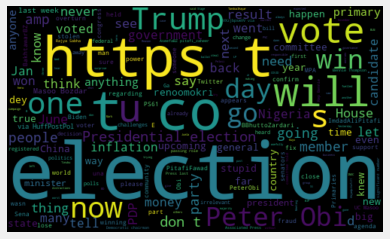

In [47]:
#Plot word cloud
allWords = ''.join([tweets for tweets in dataset['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

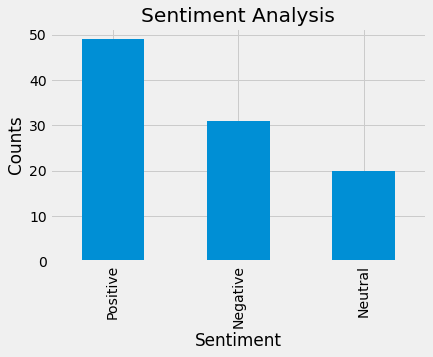

In [48]:
#Show the value counts
dataset['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Preprocessing

Used pre-processing techniques:

- Converting all characters to lower-case
- Removing all tweet mentions
- Removing URLS
- Removing Usernames
- Removing Hashtags
- Removing Punctuations
- Stop Words Removal
- Removing Numerical Data
- Removing Duplicate Characters in word

In [49]:
# Removing Duplicate Characters in word

#create the function to clean the tweets
def cleanText(tweet):
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    return tweet

#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,Election is between the Poor and Elite.\n\nMoney will disappoint so many of political in .,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,"Britain has set the pace of this election along tribal line. Cant u see ? What do u think will happen among Peter obi, Atiku and Tinubu. Guys Nigeria is the world's business center.",0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,Yesterday Meeting Held at UC Masoo Bozdar Tandoalhayar under the supervision of the MPA PS @ImdadAliPitafi &amp; other PPP notables regarding upcoming BD election\n@BakhtawarBZ \n@BBhuttoZardari \n@AseefaBZ \n@pitafi_zaheer \n@Amjadpitafi \n@PitafiFawad https://t.co/lYwMzDyWfE,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,"CPPE worries about election-fuelled inflation, distractions from governance.\n CPPE worries about election-fuelled inflation, distractions from governance. By Femi Adekoya. June | : am.\n https://t.co/LpXoPDsqb",0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,Engr. Rabi'u Kwankwaso of the NNPP will score more votes than Peter Obi of LP in Presidential election. Mark This!!!,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,Daddy Freeze sends a strong message to Peter Obi about what he must do about the election https://t.co/hlJknYDa,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,@instablogja It keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,@pangolincovid @HaroldHodson I feel sure Richard already knows they were making stuff up before the election too. \nLessons learned from a significant election loss???\nDon't think so!,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,@ezraklein Remember the Democratic primary in ... If Twitter wasn't so important then why did they feel the need to suppress DNCLrak and podesta hashtags... Oh yeah and You're on record saying of the primary election was totally fair. You've got no leg to stand on.,0.725000,0.475000,Positive


In [50]:
# Converting all characters to lower-case

#create the function to clean the tweets
def cleanText(tweet):
    tweet = tweet.lower() # convert text to lower-case
    return tweet
    
#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite.\n\nmoney will disappoint so many of political in .,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,"britain has set the pace of this election along tribal line. cant u see ? what do u think will happen among peter obi, atiku and tinubu. guys nigeria is the world's business center.",0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps @imdadalipitafi &amp; other ppp notables regarding upcoming bd election\n@bakhtawarbz \n@bbhuttozardari \n@aseefabz \n@pitafi_zaheer \n@amjadpitafi \n@pitafifawad https://t.co/lywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,"cppe worries about election-fuelled inflation, distractions from governance.\n cppe worries about election-fuelled inflation, distractions from governance. by femi adekoya. june | : am.\n https://t.co/lpxopdsqb",0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr. rabi'u kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election. mark this!!!,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election https://t.co/hljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,@instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,@pangolincovid @haroldhodson i feel sure richard already knows they were making stuff up before the election too. \nlessons learned from a significant election loss???\ndon't think so!,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,@ezraklein remember the democratic primary in ... if twitter wasn't so important then why did they feel the need to suppress dnclrak and podesta hashtags... oh yeah and you're on record saying of the primary election was totally fair. you've got no leg to stand on.,0.725000,0.475000,Positive


In [51]:
# Removing Punctuations

#create the function to clean the tweets
def cleanText(tweet):
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    return tweet

#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite\n\nmoney will disappoint so many of political in,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain has set the pace of this election along tribal line cant u see what do u think will happen among peter obi atiku and tinubu guys nigeria is the worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps imdadalipitafi amp other ppp notables regarding upcoming bd election\nbakhtawarbz \nbbhuttozardari \naseefabz \npitafizaheer \namjadpitafi \npitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries about electionfuelled inflation distractions from governance\n cppe worries about electionfuelled inflation distractions from governance by femi adekoya june am\n httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election mark this,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson i feel sure richard already knows they were making stuff up before the election too \nlessons learned from a significant election loss\ndont think so,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember the democratic primary in if twitter wasnt so important then why did they feel the need to suppress dnclrak and podesta hashtags oh yeah and youre on record saying of the primary election was totally fair youve got no leg to stand on,0.725000,0.475000,Positive


In [52]:
# Removing all mentions

#create the function to clean the tweets
def cleanText(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) #Remove mentions
    return tweet
    
#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)
#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite\n\nmoney will disappoint so many of political in,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain has set the pace of this election along tribal line cant u see what do u think will happen among peter obi atiku and tinubu guys nigeria is the worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps imdadalipitafi amp other ppp notables regarding upcoming bd election\nbakhtawarbz \nbbhuttozardari \naseefabz \npitafizaheer \namjadpitafi \npitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries about electionfuelled inflation distractions from governance\n cppe worries about electionfuelled inflation distractions from governance by femi adekoya june am\n httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election mark this,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson i feel sure richard already knows they were making stuff up before the election too \nlessons learned from a significant election loss\ndont think so,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember the democratic primary in if twitter wasnt so important then why did they feel the need to suppress dnclrak and podesta hashtags oh yeah and youre on record saying of the primary election was totally fair youve got no leg to stand on,0.725000,0.475000,Positive


In [53]:
# Removing URLS

#create the function to clean the tweets
def cleanText(tweet):
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs
    return tweet
    
#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite\n\nmoney will disappoint so many of political in,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain has set the pace of this election along tribal line cant u see what do u think will happen among peter obi atiku and tinubu guys nigeria is the worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps imdadalipitafi amp other ppp notables regarding upcoming bd election\nbakhtawarbz \nbbhuttozardari \naseefabz \npitafizaheer \namjadpitafi \npitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries about electionfuelled inflation distractions from governance\n cppe worries about electionfuelled inflation distractions from governance by femi adekoya june am\n httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election mark this,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson i feel sure richard already knows they were making stuff up before the election too \nlessons learned from a significant election loss\ndont think so,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember the democratic primary in if twitter wasnt so important then why did they feel the need to suppress dnclrak and podesta hashtags oh yeah and youre on record saying of the primary election was totally fair youve got no leg to stand on,0.725000,0.475000,Positive


In [54]:
# Removing Usernames

#create the function to clean the tweets
def cleanText(tweet):
    tweet = re.sub('@[^\s]+', '', tweet) # remove usernames
    return tweet

#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite\n\nmoney will disappoint so many of political in,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain has set the pace of this election along tribal line cant u see what do u think will happen among peter obi atiku and tinubu guys nigeria is the worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps imdadalipitafi amp other ppp notables regarding upcoming bd election\nbakhtawarbz \nbbhuttozardari \naseefabz \npitafizaheer \namjadpitafi \npitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries about electionfuelled inflation distractions from governance\n cppe worries about electionfuelled inflation distractions from governance by femi adekoya june am\n httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election mark this,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson i feel sure richard already knows they were making stuff up before the election too \nlessons learned from a significant election loss\ndont think so,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember the democratic primary in if twitter wasnt so important then why did they feel the need to suppress dnclrak and podesta hashtags oh yeah and youre on record saying of the primary election was totally fair youve got no leg to stand on,0.725000,0.475000,Positive


In [55]:
# Removing Numerical Data

#create the function to clean the tweets
def cleanText(tweet):
    tweet = ''.join([i for i in tweet if not i.isdigit()])
    return tweet

#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite\n\nmoney will disappoint so many of political in,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain has set the pace of this election along tribal line cant u see what do u think will happen among peter obi atiku and tinubu guys nigeria is the worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps imdadalipitafi amp other ppp notables regarding upcoming bd election\nbakhtawarbz \nbbhuttozardari \naseefabz \npitafizaheer \namjadpitafi \npitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries about electionfuelled inflation distractions from governance\n cppe worries about electionfuelled inflation distractions from governance by femi adekoya june am\n httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election mark this,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson i feel sure richard already knows they were making stuff up before the election too \nlessons learned from a significant election loss\ndont think so,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember the democratic primary in if twitter wasnt so important then why did they feel the need to suppress dnclrak and podesta hashtags oh yeah and youre on record saying of the primary election was totally fair youve got no leg to stand on,0.725000,0.475000,Positive


### Percentage on Half-Way of Pre-Processing

In [56]:
#Get the percentage of positive tweets
positive_tweets = dataset[dataset.Analysis == 'Positive']
positive_tweets = positive_tweets['Tweets']

round ((positive_tweets.shape[0] / dataset.shape[0]) *100 , 2)

49.0

In [57]:
#Get the percentage of negative tweets
negative_tweets = dataset[dataset.Analysis == 'Negative']
negative_tweets = negative_tweets['Tweets']

round ((negative_tweets.shape[0] / dataset.shape[0]) *100 , 1)

31.0

In [58]:
#Get the percentage of neutral tweets
neutral_tweets = dataset[dataset.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['Tweets']

round ((neutral_tweets.shape[0] / dataset.shape[0]) *100 , 1)

20.0

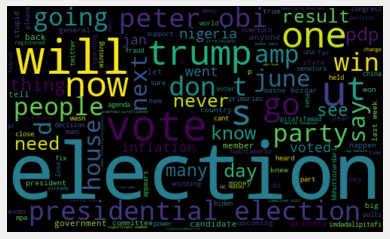

In [59]:
#Plot word cloud
allWords = ''.join([tweets for tweets in dataset['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

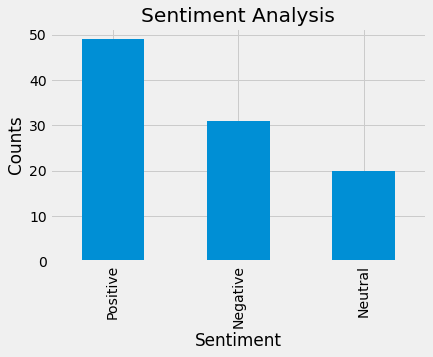

In [60]:
#Show the value counts
dataset['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Pre-Processing Continuation

In [61]:
# Removing Hashtags

#create the function to clean the tweets
def cleanText(tweet):
    tweet = re.sub(r'#([^\s]+)', '', tweet) # remove the # in #hashtag
    return tweet

#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election is between the poor and elite\n\nmoney will disappoint so many of political in,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain has set the pace of this election along tribal line cant u see what do u think will happen among peter obi atiku and tinubu guys nigeria is the worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held at uc masoo bozdar tandoalhayar under the supervision of the mpa ps imdadalipitafi amp other ppp notables regarding upcoming bd election\nbakhtawarbz \nbbhuttozardari \naseefabz \npitafizaheer \namjadpitafi \npitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries about electionfuelled inflation distractions from governance\n cppe worries about electionfuelled inflation distractions from governance by femi adekoya june am\n httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso of the nnpp will score more votes than peter obi of lp in presidential election mark this,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends a strong message to peter obi about what he must do about the election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja it keep collapsing so it can be use as an agenda for the next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson i feel sure richard already knows they were making stuff up before the election too \nlessons learned from a significant election loss\ndont think so,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember the democratic primary in if twitter wasnt so important then why did they feel the need to suppress dnclrak and podesta hashtags oh yeah and youre on record saying of the primary election was totally fair youve got no leg to stand on,0.725000,0.475000,Positive


In [62]:
# Stop Words Removal

en_stops = set(stopwords.words('english'))

#create the function to clean the tweets
def cleanText(tweet):

    temp_text = ''

    for word in tweet.split(): 
        if word not in en_stops:
            temp_text += (word + ' ')

    tweet = temp_text

    return tweet

#cleaning the tweets
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

#show cleaned tweets
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election poor elite money disappoint many political,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain set pace election along tribal line cant u see u think happen among peter obi atiku tinubu guys nigeria worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held uc masoo bozdar tandoalhayar supervision mpa ps imdadalipitafi amp ppp notables regarding upcoming bd election bakhtawarbz bbhuttozardari aseefabz pitafizaheer amjadpitafi pitafifawad httpstcolywmzdywfe,0.375000,-0.125000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries electionfuelled inflation distractions governance cppe worries electionfuelled inflation distractions governance femi adekoya june httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso nnpp score votes peter obi lp presidential election mark,0.500000,0.976562,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends strong message peter obi must election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja keep collapsing use agenda next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson feel sure richard already knows making stuff election lessons learned significant election loss dont think,0.881944,0.484375,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember democratic primary twitter wasnt important feel need suppress dnclrak podesta hashtags oh yeah youre record saying primary election totally fair youve got leg stand,0.725000,0.475000,Positive


### Output Analysis

In [63]:
#Create a function to get the subjectivity
def getSubjectivity(dataset):
    return TextBlob(dataset).sentiment.subjectivity
    
#Create a function to get the polarity
def getPolarity(dataset):
    return TextBlob(dataset).sentiment.polarity

#Create two new columns
dataset['Subjectivity'] = dataset['Tweets'].apply(getSubjectivity)
dataset['Polarity'] = dataset['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election poor elite money disappoint many political,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain set pace election along tribal line cant u see u think happen among peter obi atiku tinubu guys nigeria worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held uc masoo bozdar tandoalhayar supervision mpa ps imdadalipitafi amp ppp notables regarding upcoming bd election bakhtawarbz bbhuttozardari aseefabz pitafizaheer amjadpitafi pitafifawad httpstcolywmzdywfe,0.000000,0.000000,Negative
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries electionfuelled inflation distractions governance cppe worries electionfuelled inflation distractions governance femi adekoya june httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso nnpp score votes peter obi lp presidential election mark,0.000000,0.000000,Positive
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends strong message peter obi must election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja keep collapsing use agenda next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson feel sure richard already knows making stuff election lessons learned significant election loss dont think,0.881944,0.437500,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember democratic primary twitter wasnt important feel need suppress dnclrak podesta hashtags oh yeah youre record saying primary election totally fair youve got leg stand,0.725000,0.475000,Positive


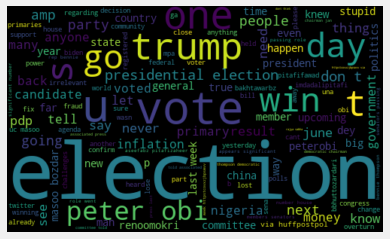

In [64]:
#Plot word cloud
allWords = ''.join([tweets for tweets in dataset['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [65]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
dataset['Analysis'] = dataset['Polarity'].apply(getAnalysis)

#show dataframe
dataset

,Twitter_ID,Date_Created,Tweets,Subjectivity,Polarity,Analysis
0,1536231166663180288,2022-06-13 06:17:06+00:00,election poor elite money disappoint many political,0.400000,0.033333,Positive
1,1536231164549246976,2022-06-13 06:17:06+00:00,britain set pace election along tribal line cant u see u think happen among peter obi atiku tinubu guys nigeria worlds business center,0.100000,-0.100000,Negative
2,1536231159784521728,2022-06-13 06:17:04+00:00,yesterday meeting held uc masoo bozdar tandoalhayar supervision mpa ps imdadalipitafi amp ppp notables regarding upcoming bd election bakhtawarbz bbhuttozardari aseefabz pitafizaheer amjadpitafi pitafifawad httpstcolywmzdywfe,0.000000,0.000000,Neutral
3,1536231149411917824,2022-06-13 06:17:02+00:00,cppe worries electionfuelled inflation distractions governance cppe worries electionfuelled inflation distractions governance femi adekoya june httpstcolpxopdsqb,0.000000,0.000000,Neutral
4,1536231145599377409,2022-06-13 06:17:01+00:00,engr rabiu kwankwaso nnpp score votes peter obi lp presidential election mark,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
95,1536230331610804224,2022-06-13 06:13:47+00:00,daddy freeze sends strong message peter obi must election httpstcohljknyda,0.733333,0.433333,Positive
96,1536230311079596032,2022-06-13 06:13:42+00:00,instablogja keep collapsing use agenda next election,0.000000,0.000000,Neutral
97,1536230295607083008,2022-06-13 06:13:38+00:00,pangolincovid haroldhodson feel sure richard already knows making stuff election lessons learned significant election loss dont think,0.881944,0.437500,Positive
98,1536230294516269056,2022-06-13 06:13:38+00:00,ezraklein remember democratic primary twitter wasnt important feel need suppress dnclrak podesta hashtags oh yeah youre record saying primary election totally fair youve got leg stand,0.725000,0.475000,Positive


In [66]:
#print all of the positive tweets
j=1
sortedDS = dataset.sort_values(by=['Polarity'])

for i in range(0, sortedDS.shape[0]):
    if (sortedDS['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' +sortedDS['Tweets'][i])
        print()
        j=j+1

1) election poor elite money disappoint many political 

2) “it appears significant number house members senators passing role went on” rep bennie thompson democratic chairman jan committee told associated press last week httpstcovxzjbpswvv via huffpostpol 

3) train wrecknot sure us survive term another election open border hot inflation hb laptops mental degradation questionable family businesseasy china way dog heal far left agenda destroy within httpstcoihbblldzg 

4) kenyans miss second tranche percent cut electricity bills pledge shifted next government august general election bdafrica httpstcohliulres 

5) politics “a peaceful transition power” handing deputy option needed election stick httpstcokibidltxuq 

6) cagop secretary state candidate gone full election conspiracy cultist surprise httpstcogmapchrj 

7) westandunited foxnews jessebwatters speakerpelosi trump spied obama prior toand presidency treason blm burned cities amp responsible many deaths amp billions damages pelos

In [67]:
#print all of the negative tweets
j=1
sortedDS = dataset.sort_values(by=['Polarity'], ascending=False)

for i in range(0, sortedDS.shape[0]):
    if (sortedDS['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' +sortedDS['Tweets'][i])
        print()
        j=j+1

1) britain set pace election along tribal line cant u see u think happen among peter obi atiku tinubu guys nigeria worlds business center 

2) potus load 💩 americans crushed don’t give damn it’s intentional said election he’d stupid people voted puppet 

3) therightcant r repellent e electiondenying p phony u unapologetic b blowhard l liars incapable c conceding n needing others govern give keys congress november won’t lower gas prices fix inflation don’t care 

4) lock witness account mark meadows burning documents meeting overturning election expected part upcoming hearings jan house committee httpstcoxtmbljc via huffpostpol 

5) jdwallen bnbbusstop senrickscott joebiden case please define “communism” list current presidential policies confirm allegation biden communist you’re trumplican please tell us voted past presidential election i’m curious 

6) would read story three worst prime ministers country three majority shot anything disposable completely f’ed say election close well w

In [68]:
#print all of the neutral tweets
j=1
sortedDS = dataset.sort_values(by=['Polarity'], ascending=False)

for i in range(0, sortedDS.shape[0]):
    if (sortedDS['Analysis'][i] == 'Neutral'):
        print(str(j) + ') ' +sortedDS['Tweets'][i])
        print()
        j=j+1

1) yesterday meeting held uc masoo bozdar tandoalhayar supervision mpa ps imdadalipitafi amp ppp notables regarding upcoming bd election bakhtawarbz bbhuttozardari aseefabz pitafizaheer amjadpitafi pitafifawad httpstcolywmzdywfe 

2) cppe worries electionfuelled inflation distractions governance cppe worries electionfuelled inflation distractions governance femi adekoya june httpstcolpxopdsqb 

3) engr rabiu kwankwaso nnpp score votes peter obi lp presidential election mark 

4) narendramodis party expelled nupursharmabjp party speaking truth asking pmoindia support let tell election next year people supported lose election httpstcoxinfwmgayv 

5) saintafc farooqkperogi fire mr man thing u lose election woefully fact self u try see 

6) tmfscottp humpheryjenner dont think would big concern anyone face election 

7) megamagamat averydausson wikieveonline teesebaker wanganuiorg nzherald motivation stage trump derangement money paid ballot steal election admitted camera mules httpstcoxnat

In [69]:
#Get the percentage of positive tweets
positive_tweets = dataset[dataset.Analysis == 'Positive']
positive_tweets = positive_tweets['Tweets']

round ((positive_tweets.shape[0] / dataset.shape[0]) *100 , 2)

47.0

In [70]:
#Get the percentage of negative tweets
negative_tweets = dataset[dataset.Analysis == 'Negative']
negative_tweets = negative_tweets['Tweets']

round ((negative_tweets.shape[0] / dataset.shape[0]) *100 , 1)

31.0

In [71]:
#Get the percentage of neutral tweets
neutral_tweets = dataset[dataset.Analysis == 'Neutral']
neutral_tweets = neutral_tweets['Tweets']

round ((neutral_tweets.shape[0] / dataset.shape[0]) *100 , 1)

22.0

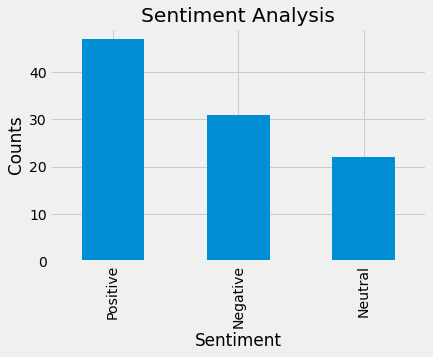

In [72]:
#Show the value counts
dataset['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Saving the cleaned dataset

In [73]:
# Save Cleaned Dataset

dataset.to_csv('cleaned_dataset.csv', columns = ['Twitter_ID', 'Date_Created','Tweets'], index = False) 